In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv


In [9]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
trades_df = pd.read_csv('historical_data.csv')

In [10]:
trades_df = trades_df.dropna(subset=['Timestamp IST'])
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [12]:
daily_metrics = trades_df.groupby(['Account', 'date']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    trade_count=('Trade ID', 'count'),
    total_volume=('Size USD', 'sum'),
    wins=('Closed PnL', lambda x: (x > 0).sum())
).reset_index()

daily_metrics['win_rate'] = daily_metrics['wins'] / daily_metrics['trade_count']

In [15]:
df = pd.merge(daily_metrics, sentiment_df[['date', 'value', 'classification']], on='date', how='inner')

/tmp/ipython-input-3558987933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='classification', y='daily_pnl', palette='RdYlGn',


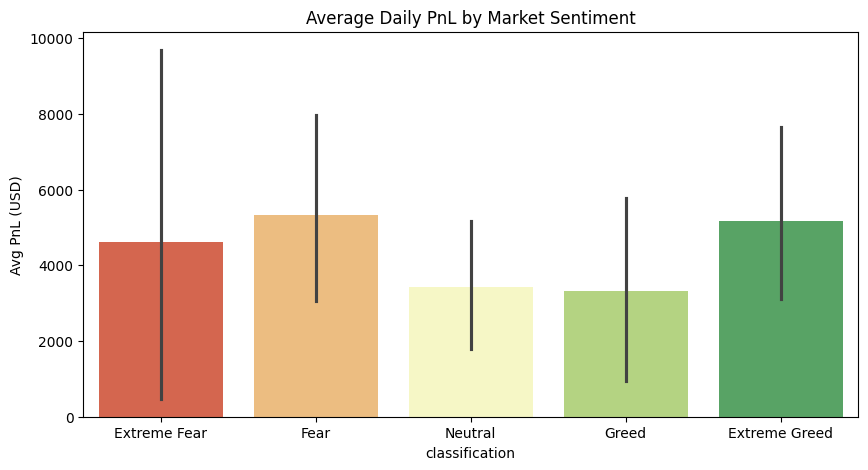

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='classification', y='daily_pnl', palette='RdYlGn',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Average Daily PnL by Market Sentiment')
plt.ylabel('Avg PnL (USD)')
plt.show()

/tmp/ipython-input-919596621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='classification', y='trade_count', palette='mako',


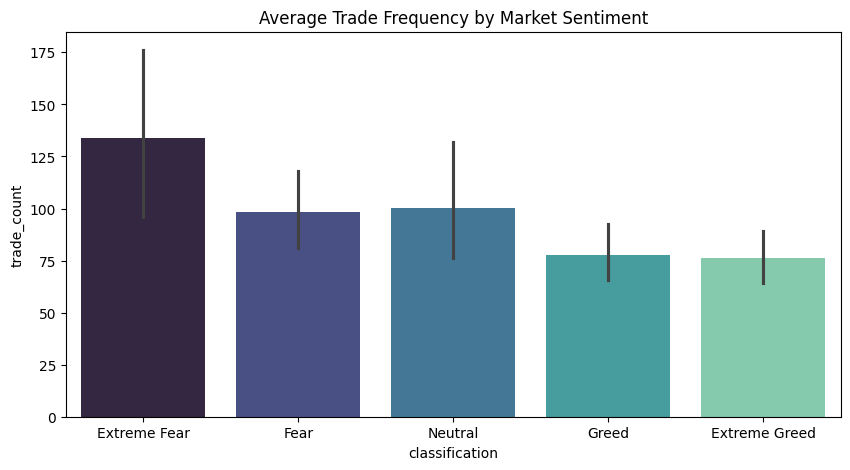

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='classification', y='trade_count', palette='mako',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Average Trade Frequency by Market Sentiment')
plt.show()